In [1]:
import numpy as np
import json
import seaborn as sns
import pandas as pd
import os
import glob
import SimpleITK as itk

import paths
import glob 
import json

#ref = glob.glob(os.path.join('summary','*'))
#summary


# Evaluation

## Process segmentation evaluation documents (.json)

In [2]:
def reconstruct_df_from_json(path):
    sum_path = os.path.join(path, 'summary.json')
    with open(sum_path) as file:
        json_dict = json.load(file)
        
    score_dict1 = {}
    score_dict2 = {}
    metrics = json_dict['results']['all'][0]['1'].keys()
    
    for i,data in enumerate(json_dict['results']['all']):
            pt_name = json_dict['results']['all'][i]['reference'][-16:-7]
            #patient_list.append(pt_name)
            score_dict1[pt_name] = dict()
            #score_dict2[pt_name] = dict()
            #score_dict1[pt_name]['PatientID'] = pt_name
            for metric in metrics:
                if metric != 'volume_diff':
                    if metric == 'Hausdorff Distance 95':
                        score_dict1[pt_name]['HD95 (mm)'] = data['1'][metric]
                    elif metric == 'Avg. Surface Distance':
                        score_dict1[pt_name]['Mean Surface Distance (mm)'] = data['1'][metric]
                    elif metric == 'Total Positives Reference':
                        score_dict1[pt_name]['Volume (cc)'] = np.round(data['1'][metric]/1000,2)
                    elif metric == 'Total Positives Test':
                        score_dict1[pt_name]['Pred Volume (cc)'] = np.round(data['1'][metric]/1000,2)
                    else:
                        score_dict1[pt_name][metric] = data['1'][metric]
            score_dict1[pt_name]['GTV'] = 0
                        
                        
    for i,data in enumerate(json_dict['results']['all']):
            pt_name = json_dict['results']['all'][i]['reference'][-16:-7]
            #patient_list.append(pt_name)
            score_dict2[pt_name] = dict()
            #score_dict2[pt_name] = dict()
            #score_dict2[pt_name]['PatientID'] = pt_name
            for metric in metrics:
                if metric != 'volume_diff':
                    if metric == 'Hausdorff Distance 95':
                        score_dict2[pt_name]['HD95 (mm)'] = data['2'][metric]
                    elif metric == 'Avg. Surface Distance':
                        score_dict2[pt_name]['Mean Surface Distance (mm)'] = data['2'][metric]
                    elif metric == 'Total Positives Reference':
                        score_dict2[pt_name]['Volume (cc)'] = np.round(data['2'][metric]/1000,2)
                    elif metric == 'Total Positives Test':
                        score_dict2[pt_name]['Pred Volume (cc)'] = np.round(data['2'][metric]/1000,2)
                    else:
                        score_dict2[pt_name][metric] = data['2'][metric]
            score_dict2[pt_name]['GTV'] = 1

    return score_dict1, score_dict2


pred_gtvt, pred_gtvn  = reconstruct_df_from_json(paths.pred)
feed_gtvt, feed_gtvn  = reconstruct_df_from_json(paths.feed_pred)
df_pred_gtvt = pd.DataFrame(pred_gtvt).T
df_pred_gtvt['group'] = 'scans only'
df_pred_gtvn = pd.DataFrame(pred_gtvn).T
df_pred_gtvn['group'] = 'scans only'

df_feed_gtvt = pd.DataFrame(feed_gtvt).T
df_feed_gtvt['group'] = 'scans & user feed'
df_feed_gtvn = pd.DataFrame(feed_gtvn).T
df_feed_gtvn['group'] = 'scans & user feed'


In [3]:
df_pred_gtvt

,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_003,0.999758,1.257370,0.653735,0.067908,0.496599,0.000225,0.000017,9.000000,0.485592,0.999775,0.932092,0.503401,0.491374,0.658325,0.782642,10.14,5.48,0.999983,0.0,scans only
HNCDL_007,0.998550,3.687023,0.208169,0.474557,0.870204,0.001278,0.000172,25.695329,0.116177,0.998722,0.525443,0.129796,0.184391,0.275761,0.353869,24.42,6.03,0.999828,0.0,scans only
HNCDL_010,0.999253,1.395519,0.731732,0.099083,0.383957,0.000636,0.000112,7.892907,0.576953,0.999364,0.900917,0.616043,0.454949,0.608316,0.732766,26.15,17.88,0.999888,0.0,scans only
HNCDL_011,0.999138,1.596526,0.413178,0.054655,0.735640,0.000845,0.000018,14.623606,0.260380,0.999155,0.945345,0.264360,0.241976,0.361146,0.474364,17.86,5.00,0.999982,0.0,scans only
HNCDL_034,0.998455,2.524944,0.829663,0.040054,0.269482,0.001393,0.000158,7.681146,0.708910,0.998607,0.959946,0.730518,0.441974,0.605658,0.743490,97.24,74.00,0.999842,0.0,scans only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNCDL_868,0.998615,1.467857,0.827484,0.166791,0.178162,0.000723,0.000668,6.000000,0.705734,0.999277,0.833209,0.821838,0.530320,0.713019,0.837603,70.42,69.46,0.999332,0.0,scans only
HNCDL_869,0.999571,2.053086,0.688769,0.308373,0.314066,0.000218,0.000212,5.099020,0.525284,0.999782,0.691627,0.685934,0.485089,0.690477,0.855615,11.06,10.96,0.999788,0.0,scans only
HNCDL_876,0.999353,15.556292,0.832678,0.248497,0.066487,0.000115,0.000533,72.006944,0.713323,0.999885,0.751503,0.933513,0.645546,0.783892,0.853106,32.67,40.58,0.999467,0.0,scans only
HNCDL_879,0.999629,1.301903,0.764988,0.193123,0.272766,0.000227,0.000145,5.099020,0.619418,0.999773,0.806877,0.727234,0.550879,0.741233,0.876108,14.13,12.74,0.999855,0.0,scans only


In [4]:
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import wilcoxon

# use if data is normal distributed
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return np.round(m,2 ), np.round(m-h,2 ), np.round(m+h,2 )


# use if data is screwed
def bootstrap_confidence_interval(data, func=np.mean, confidence=95, size=10000):
    """
    func could be np.mean/np.median
    """
    
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
        
    conf_interval = np.percentile(bs_replicates,[100-confidence,confidence])
    
    return np.round(func(bs_replicates), 2), np.round(conf_interval,2)

def calcualte_test(x, y, method = scipy.stats.wilcoxon):
    # method could also be pearsonr
    nas = np.logical_or(np.isnan(x), np.isnan(y)) # remove nan
    r, p = method(x[~nas], y[~nas])
    ps = ''
    print(r,p) 
    if p< 0.05:
        ps = 'p-value<0.05'
    if p< 0.01:
        ps = 'p-value<0.01'    
    if p< 0.001:
        ps = 'p-value<0.001'
    if p< 0.0001:
        ps = 'p-value<0.0001'
    if p> 0.05:
        ps = 'p-value='+str(p)
    return r, ps          
            

def add_median_ci_labels(ax, fmt='.2f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}'.lstrip('0'), ha='center', va='center',  color='white', fontweight='bold', fontsize=8)
                       
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground=median.get_color()),
            path_effects.Normal(),
        ])


## Segmentation results description

In [5]:
print('Results default GTVt')
df_pred_gtvt.describe()

Results default GTVt


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,0.999449,3.851630,0.677356,0.264789,0.315729,0.000348,2.039410e-04,12.064352,0.545633,0.999652,0.735211,0.684271,0.514123,0.664244,0.766221,21.992268,19.482680,0.999796,0.0
std,0.000549,7.796678,0.215528,0.203639,0.249008,0.000538,1.830547e-04,14.026151,0.210392,0.000538,0.203639,0.249008,0.186827,0.212661,0.218978,21.771827,20.092597,0.000183,0.0
min,0.996229,0.761174,0.000000,0.000912,0.018018,0.000003,2.460427e-07,2.000000,0.000000,0.996298,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,1.850000,0.999105,0.0
25%,0.999384,1.127717,0.618957,0.132553,0.128090,0.000091,8.464108e-05,4.387208,0.448181,0.999620,0.691627,0.569850,0.441974,0.605658,0.726676,8.440000,5.720000,0.999760,0.0
50%,0.999609,1.454210,0.749450,0.208152,0.252093,0.000158,1.500086e-04,6.082763,0.599296,0.999842,0.791848,0.747907,0.569136,0.733322,0.847607,14.130000,12.360000,0.999850,0.0
75%,0.999774,2.342130,0.830942,0.308373,0.430150,0.000380,2.403637e-04,13.928388,0.710779,0.999909,0.867447,0.871910,0.649463,0.811988,0.906619,27.230000,24.160000,0.999915,0.0
max,0.999918,47.001383,0.906948,1.000000,1.000000,0.003702,8.953212e-04,74.357246,0.829739,0.999997,0.999088,0.981982,0.873147,0.980440,0.999916,97.240000,90.340000,1.000000,0.0


In [6]:
print('Results default GTVn')
df_pred_gtvn.describe()

Results default GTVn


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV
count,97.000000,70.000000,84.000000,85.000000,73.000000,97.000000,97.000000,70.000000,84.000000,97.000000,81.000000,73.000000,70.000000,70.000000,70.000000,97.000000,97.000000,97.000000,97.0
mean,0.999741,5.213154,0.632689,0.311314,0.264472,0.000126,0.000133,20.124460,0.532038,0.999874,0.673313,0.735528,0.704637,0.815232,0.860892,13.241649,13.422680,0.999867,1.0
std,0.000286,10.142203,0.329693,0.321510,0.244736,0.000154,0.000187,25.882907,0.293598,0.000154,0.321639,0.244736,0.174475,0.184344,0.184008,17.350718,18.423918,0.000187,0.0
min,0.998478,0.470803,0.000000,0.000000,0.026340,0.000000,0.000000,2.000000,0.000000,0.999102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998892,1.0
25%,0.999698,0.731693,0.574334,0.112832,0.117999,0.000006,0.000024,2.544224,0.402873,0.999825,0.684120,0.720302,0.639027,0.750939,0.837115,0.950000,1.250000,0.999833,1.0
50%,0.999813,1.039263,0.785111,0.182721,0.177432,0.000086,0.000079,6.000000,0.646241,0.999914,0.814289,0.822568,0.744261,0.878097,0.924088,7.300000,7.430000,0.999921,1.0
75%,0.999931,2.520685,0.856710,0.309500,0.279698,0.000175,0.000167,28.612225,0.749337,0.999994,0.881684,0.882001,0.818682,0.932194,0.972267,19.000000,18.380000,0.999976,1.0
max,1.000000,47.564278,0.923582,1.000000,1.000000,0.000898,0.001108,85.523096,0.858015,1.000000,0.979368,0.973660,0.910440,0.984692,0.999742,86.210000,98.780000,1.000000,1.0


In [7]:
print('Results of User Feed GTVt')
df_feed_gtvt.describe()

Results of User Feed GTVt


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,0.999474,1.697107,0.712906,0.220507,0.289517,0.000340,1.867438e-04,8.130215,0.576616,0.999660,0.779493,0.710483,0.557273,0.710325,0.809513,21.992268,19.286392,0.999813,0.0
std,0.000594,1.309810,0.166773,0.153321,0.209491,0.000572,1.785079e-04,7.243206,0.179346,0.000572,0.153321,0.209491,0.161637,0.173613,0.167335,21.771827,19.690038,0.000179,0.0
min,0.995354,0.702838,0.063391,0.000346,0.012164,0.000007,5.465198e-08,2.000000,0.032733,0.995353,0.211757,0.032733,0.026314,0.042021,0.066908,1.310000,1.490000,0.999203,0.0
25%,0.999410,0.992915,0.627467,0.117093,0.133356,0.000088,6.934295e-05,4.123106,0.457160,0.999648,0.737414,0.598347,0.474720,0.636223,0.748807,8.440000,6.210000,0.999756,0.0
50%,0.999647,1.290554,0.765408,0.180870,0.227499,0.000166,1.280045e-04,5.830952,0.619968,0.999834,0.819130,0.772501,0.578570,0.750545,0.853364,14.130000,13.080000,0.999872,0.0
75%,0.999772,1.778589,0.836003,0.262586,0.401653,0.000352,2.444799e-04,9.165151,0.718218,0.999912,0.882907,0.866644,0.668921,0.827267,0.917101,27.230000,23.980000,0.999931,0.0
max,0.999945,10.414300,0.907220,0.788243,0.967267,0.004647,7.966984e-04,45.274159,0.830194,0.999993,0.999654,0.987836,0.875984,0.979201,0.999710,97.240000,96.960000,1.000000,0.0


In [8]:
print('Results of User Feed GTVn')
df_feed_gtvn.describe()

Results of User Feed GTVn


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV
count,97.000000,73.000000,74.000000,85.000000,73.000000,97.000000,97.000000,73.000000,74.000000,97.000000,74.000000,73.000000,73.000000,73.000000,73.000000,97.000000,97.000000,97.000000,97.0
mean,0.999778,1.509008,0.809622,0.159398,0.171626,0.000111,0.000112,4.989909,0.692776,0.999889,0.816907,0.828374,0.792454,0.903989,0.947402,13.241649,13.293093,0.999888,1.0
std,0.000288,5.038829,0.121889,0.147212,0.086021,0.000163,0.000164,9.333630,0.128490,0.000163,0.143315,0.086021,0.104593,0.086959,0.073038,17.350718,17.874542,0.000164,0.0
min,0.998376,0.476319,0.000000,0.000000,0.024825,0.000000,0.000000,1.732051,0.000000,0.998937,0.000000,0.544106,0.469578,0.547202,0.559524,0.000000,0.000000,0.999049,1.0
25%,0.999729,0.680867,0.790660,0.081967,0.109176,0.000005,0.000006,2.236068,0.653795,0.999860,0.783672,0.781261,0.736894,0.863420,0.941254,0.950000,0.920000,0.999861,1.0
50%,0.999850,0.800983,0.823206,0.140050,0.149549,0.000063,0.000065,2.449490,0.699536,0.999937,0.840277,0.850451,0.822396,0.936975,0.973762,7.300000,7.770000,0.999935,1.0
75%,0.999976,1.045349,0.870971,0.204521,0.218739,0.000140,0.000139,3.741657,0.771434,0.999995,0.900629,0.890824,0.881826,0.956823,0.990821,19.000000,18.020000,0.999994,1.0
max,1.000000,43.833580,0.923022,1.000000,0.455894,0.001063,0.000951,77.959605,0.857049,1.000000,0.980395,0.975175,0.917889,0.993224,1.000000,86.210000,95.720000,1.000000,1.0


GTV-T

In [9]:
method = 'Dice'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)                       
method = 'HD95 (mm)'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)             
method = 'Mean Surface Distance (mm)'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)   
method = 'Surface Dice 2mm'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)                   
method = 'False Discovery Rate'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)                 
method = 'False Negative Rate'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)    

1473.0 0.0011499804820452135
- Dice p-value<0.01
1572.0 0.027255051060577854
- HD95 (mm) p-value<0.05
1104.0 4.677565080441811e-06
- Mean Surface Distance (mm) p-value<0.0001
1332.0 0.00017103378168492739
- Surface Dice 2mm p-value<0.001
1133.0 7.66247238212394e-06
- False Discovery Rate p-value<0.0001
2287.0 0.7474209156959064
- False Negative Rate p-value=0.7474209156959064


GTV-N

In [10]:
method = 'Dice'
_, p = calcualte_test(df_pred_gtvn[method], df_feed_gtvn[method])
print('-',method, p)                       
method = 'HD95 (mm)'

_, p = calcualte_test(df_pred_gtvn[method], df_feed_gtvn[method])
print('-',method, p)      
method = 'Mean Surface Distance (mm)'
_, p = calcualte_test(df_pred_gtvn[method], df_feed_gtvn[method])
print('-',method, p)   
method = 'Surface Dice 2mm'
_, p = calcualte_test(df_pred_gtvt[method], df_feed_gtvt[method])
print('-',method, p)   
method = 'False Discovery Rate'
_, p = calcualte_test(df_pred_gtvn[method], df_feed_gtvn[method])
print('-',method, p)                 
method = 'False Negative Rate'
_, p = calcualte_test(df_pred_gtvn[method], df_feed_gtvn[method])
print('-',method, p)   

367.0 6.414412572079551e-08
- Dice p-value<0.0001
145.0 1.0004474724237106e-07
- HD95 (mm) p-value<0.0001
595.0 0.00015107952990395753
- Mean Surface Distance (mm) p-value<0.001
1332.0 0.00017103378168492739
- Surface Dice 2mm p-value<0.001
923.5 7.417713855437065e-05
- False Discovery Rate p-value<0.0001
743.0 0.0008384922490423235
- False Negative Rate p-value<0.001


In [11]:

#stats.ttest_rel(df_pred_gtvt['False Discovery Rate'].dropna(), df_feed_gtvt['False Discovery Rate'].dropna())
calcualte_test(df_pred_gtvt['False Discovery Rate'], df_feed_gtvt['False Discovery Rate'])


1133.0 7.66247238212394e-06


(1133.0, 'p-value<0.0001')

In [12]:

calcualte_test(df_pred_gtvn['False Discovery Rate'], df_feed_gtvn['False Discovery Rate'])


923.5 7.417713855437065e-05


(923.5, 'p-value<0.0001')

In [13]:
from scipy import stats

calcualte_test(df_pred_gtvt['False Negative Rate'], df_feed_gtvt['False Negative Rate'])


2287.0 0.7474209156959064


(2287.0, 'p-value=0.7474209156959064')

In [14]:
from scipy import stats

calcualte_test(df_pred_gtvn['False Negative Rate'], df_feed_gtvn['False Negative Rate'])


743.0 0.0008384922490423235


(743.0, 'p-value<0.001')

### normal dist mean/CI95

In [15]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['Dice'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['Dice'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['Dice'].dropna()))
print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['Dice'].dropna()))

pred GTV-T, mean, CI95 (0.68, array([0.64, 0.71]))
feed GTV-T, mean, CI95 (0.71, array([0.69, 0.74]))
pred GTV-N, mean, CI95 (0.63, array([0.57, 0.69]))
feed GTV-N, mean, CI95 (0.81, array([0.78, 0.83]))


In [16]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['Mean Surface Distance (mm)'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['Mean Surface Distance (mm)'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['Mean Surface Distance (mm)'].dropna()))

print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['Mean Surface Distance (mm)'].dropna()))

pred GTV-T, mean, CI95 (3.85, array([2.67, 5.22]))
feed GTV-T, mean, CI95 (1.7, array([1.49, 1.93]))
pred GTV-N, mean, CI95 (5.19, array([3.32, 7.28]))
feed GTV-N, mean, CI95 (1.51, array([0.87, 2.68]))


In [17]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['Surface Dice 2mm'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['Surface Dice 2mm'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['Surface Dice 2mm'].dropna()))

print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['Surface Dice 2mm'].dropna()))

pred GTV-T, mean, CI95 (0.66, array([0.63, 0.7 ]))
feed GTV-T, mean, CI95 (0.71, array([0.68, 0.74]))
pred GTV-N, mean, CI95 (0.81, array([0.78, 0.85]))
feed GTV-N, mean, CI95 (0.9, array([0.89, 0.92]))


In [18]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['HD95 (mm)'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['HD95 (mm)'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['HD95 (mm)'].dropna()))

print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['HD95 (mm)'].dropna()))

pred GTV-T, mean, CI95 (12.06, array([ 9.82, 14.49]))
feed GTV-T, mean, CI95 (8.13, array([6.99, 9.39]))
pred GTV-N, mean, CI95 (20.18, array([15.16, 25.33]))
feed GTV-N, mean, CI95 (4.96, array([3.53, 6.94]))


In [19]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['False Discovery Rate'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['False Discovery Rate'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['False Discovery Rate'].dropna()))

print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['False Discovery Rate'].dropna()))

pred GTV-T, mean, CI95 (0.26, array([0.23, 0.3 ]))
feed GTV-T, mean, CI95 (0.22, array([0.2 , 0.25]))
pred GTV-N, mean, CI95 (0.31, array([0.26, 0.37]))
feed GTV-N, mean, CI95 (0.16, array([0.14, 0.19]))


In [20]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['False Negative Rate'].dropna()))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['False Negative Rate'].dropna()))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['False Negative Rate'].dropna()))
print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['False Negative Rate'].dropna()))

pred GTV-T, mean, CI95 (0.32, array([0.27, 0.36]))
feed GTV-T, mean, CI95 (0.29, array([0.25, 0.33]))
pred GTV-N, mean, CI95 (0.27, array([0.22, 0.31]))
feed GTV-N, mean, CI95 (0.17, array([0.16, 0.19]))


### bootstrap median/CI95

In [21]:
print('pred GTV-T, mean, CI95', bootstrap_confidence_interval(df_pred_gtvt['Dice'].dropna(), np.mean))
print('pred GTV-N, mean, CI95', bootstrap_confidence_interval(df_pred_gtvn['Dice'].dropna(), np.mean))
print('feed GTV-T, mean, CI95', bootstrap_confidence_interval(df_feed_gtvt['Dice'].dropna(), np.mean))
print('feed GTV-N, mean, CI95', bootstrap_confidence_interval(df_feed_gtvn['Dice'].dropna(), np.mean))

pred GTV-T, mean, CI95 (0.68, array([0.64, 0.71]))
pred GTV-N, mean, CI95 (0.63, array([0.57, 0.69]))
feed GTV-T, mean, CI95 (0.71, array([0.68, 0.74]))
feed GTV-N, mean, CI95 (0.81, array([0.78, 0.83]))


In [22]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['Dice'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['Dice'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['Dice'].dropna(), np.median))
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['Dice'].dropna(), np.median))

pred GTV-T, median, CI95 (0.75, array([0.72, 0.8 ]))
feed GTV-T, median, CI95 (0.77, array([0.72, 0.79]))
pred GTV-N, median, CI95 (0.79, array([0.76, 0.82]))
feed GTV-N, median, CI95 (0.82, array([0.81, 0.84]))


In [23]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['Mean Surface Distance (mm)'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['Mean Surface Distance (mm)'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['Mean Surface Distance (mm)'].dropna(), np.median))
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['Mean Surface Distance (mm)'].dropna(), np.median))

pred GTV-T, median, CI95 (1.45, array([1.34, 1.64]))
feed GTV-T, median, CI95 (1.29, array([1.21, 1.47]))
pred GTV-N, median, CI95 (1.04, array([0.89, 1.17]))
feed GTV-N, median, CI95 (0.8, array([0.73, 0.89]))


In [24]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['HD95 (mm)'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['HD95 (mm)'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['HD95 (mm)'].dropna(), np.median))
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['HD95 (mm)'].dropna(), np.median))

pred GTV-T, median, CI95 (6.08, array([5.39, 7.31]))
feed GTV-T, median, CI95 (5.83, array([5.1 , 6.68]))
pred GTV-N, median, CI95 (6.0, array([3.61, 9.14]))
feed GTV-N, median, CI95 (2.45, array([2.24, 3.  ]))


In [25]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['Surface Dice 2mm'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['Surface Dice 2mm'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['Surface Dice 2mm'].dropna(), np.median))

print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['Surface Dice 2mm'].dropna(), np.median))

pred GTV-T, median, CI95 (0.73, array([0.69, 0.75]))
feed GTV-T, median, CI95 (0.75, array([0.73, 0.77]))
pred GTV-N, median, CI95 (0.88, array([0.84, 0.91]))
feed GTV-N, median, CI95 (0.94, array([0.93, 0.95]))


In [26]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['False Discovery Rate'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['False Discovery Rate'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['False Discovery Rate'].dropna(), np.median))
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['False Discovery Rate'].dropna(), np.median))

pred GTV-T, median, CI95 (0.21, array([0.19, 0.24]))
feed GTV-T, median, CI95 (0.18, array([0.15, 0.2 ]))
pred GTV-N, median, CI95 (0.18, array([0.17, 0.21]))
feed GTV-N, median, CI95 (0.14, array([0.11, 0.17]))


In [27]:
print('pred GTV-T, median, CI95', bootstrap_confidence_interval(df_pred_gtvt['False Negative Rate'].dropna(), np.median))
print('feed GTV-T, median, CI95', bootstrap_confidence_interval(df_feed_gtvt['False Negative Rate'].dropna(), np.median))
print('pred GTV-N, median, CI95', bootstrap_confidence_interval(df_pred_gtvn['False Negative Rate'].dropna(), np.median))
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['False Negative Rate'].dropna(), np.median))

pred GTV-T, median, CI95 (0.25, array([0.19, 0.28]))
feed GTV-T, median, CI95 (0.23, array([0.18, 0.26]))
pred GTV-N, median, CI95 (0.18, array([0.15, 0.23]))
feed GTV-N, median, CI95 (0.15, array([0.14, 0.18]))


In [28]:
print('feed GTV-N, median, CI95', bootstrap_confidence_interval(df_feed_gtvn['Surface Dice 2mm'].dropna(), np.mean))

feed GTV-N, median, CI95 (0.9, array([0.89, 0.92]))


In [29]:
df_pred_gtvn['False Negative Rate']

HNCDL_003    0.080869
HNCDL_007    0.233046
HNCDL_010         NaN
HNCDL_011    0.076964
HNCDL_034    0.224596
               ...   
HNCDL_868    0.380996
HNCDL_869    0.279698
HNCDL_876         NaN
HNCDL_879    0.127744
HNCDL_882    0.566501
Name: False Negative Rate, Length: 97, dtype: float64

In [30]:
# df_pred_gtvt
# df_pred_gtvn
# df_feed_gtvt
# df_feed_gtvn

In [31]:
dft = df_pred_gtvt.append(df_feed_gtvt)
dfn = df_pred_gtvn.append(df_feed_gtvn)
dft

/tmp/ipykernel_2118024/158406829.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dft = df_pred_gtvt.append(df_feed_gtvt)
/tmp/ipykernel_2118024/158406829.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn = df_pred_gtvn.append(df_feed_gtvn)


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_003,0.999758,1.257370,0.653735,0.067908,0.496599,0.000225,0.000017,9.000000,0.485592,0.999775,0.932092,0.503401,0.491374,0.658325,0.782642,10.14,5.48,0.999983,0.0,scans only
HNCDL_007,0.998550,3.687023,0.208169,0.474557,0.870204,0.001278,0.000172,25.695329,0.116177,0.998722,0.525443,0.129796,0.184391,0.275761,0.353869,24.42,6.03,0.999828,0.0,scans only
HNCDL_010,0.999253,1.395519,0.731732,0.099083,0.383957,0.000636,0.000112,7.892907,0.576953,0.999364,0.900917,0.616043,0.454949,0.608316,0.732766,26.15,17.88,0.999888,0.0,scans only
HNCDL_011,0.999138,1.596526,0.413178,0.054655,0.735640,0.000845,0.000018,14.623606,0.260380,0.999155,0.945345,0.264360,0.241976,0.361146,0.474364,17.86,5.00,0.999982,0.0,scans only
HNCDL_034,0.998455,2.524944,0.829663,0.040054,0.269482,0.001393,0.000158,7.681146,0.708910,0.998607,0.959946,0.730518,0.441974,0.605658,0.743490,97.24,74.00,0.999842,0.0,scans only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNCDL_868,0.998819,1.231531,0.848074,0.116963,0.184226,0.000747,0.000438,5.830952,0.736223,0.999253,0.883037,0.815774,0.590350,0.752659,0.863460,70.42,65.06,0.999562,0.0,scans & user feed
HNCDL_869,0.999558,1.971066,0.707833,0.346845,0.227499,0.000158,0.000284,4.358899,0.547787,0.999842,0.653155,0.772501,0.476866,0.708265,0.883344,11.06,13.08,0.999716,0.0,scans & user feed
HNCDL_876,0.999613,1.029381,0.890251,0.130061,0.088466,0.000153,0.000235,3.000000,0.802209,0.999847,0.869939,0.911534,0.729530,0.887690,0.968391,32.67,34.23,0.999765,0.0,scans & user feed
HNCDL_879,0.999662,1.210326,0.791566,0.190367,0.225713,0.000187,0.000151,4.472136,0.655034,0.999813,0.809633,0.774287,0.610921,0.809142,0.917017,14.13,13.52,0.999849,0.0,scans & user feed


In [32]:
dfn

,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_003,0.998816,1.693379,0.856693,0.197801,0.080869,0.000313,0.000876,6.000000,0.749312,0.999687,0.802199,0.919131,0.554271,0.715031,0.839382,86.21,98.78,0.999124,1.0,scans only
HNCDL_007,0.999848,0.831018,0.845592,0.057802,0.233046,0.000127,0.000026,2.236068,0.732489,0.999873,0.942198,0.766954,0.804979,0.944879,0.991409,9.05,7.37,0.999974,1.0,scans only
HNCDL_010,0.999781,NaN,0.000000,1.000000,NaN,0.000000,0.000219,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.00,3.46,0.999781,1.0,scans only
HNCDL_011,0.999714,1.611183,0.902726,0.116710,0.076964,0.000111,0.000175,3.316625,0.822698,0.999889,0.883290,0.923036,0.840397,0.922194,0.945701,22.34,23.34,0.999825,1.0,scans only
HNCDL_034,0.999454,1.333207,0.752700,0.268712,0.224596,0.000241,0.000305,6.403124,0.603464,0.999759,0.731288,0.775404,0.561339,0.763604,0.889803,20.22,21.44,0.999695,1.0,scans only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNCDL_868,0.999438,0.990833,0.798403,0.134431,0.259090,0.000390,0.000173,4.000000,0.664452,0.999610,0.865569,0.740910,0.672957,0.843041,0.929805,26.18,22.41,0.999827,1.0,scans & user feed
HNCDL_869,0.998794,1.544865,0.780309,0.063519,0.331221,0.001063,0.000146,16.124515,0.639759,0.998937,0.936481,0.668779,0.469578,0.607349,0.723356,51.12,36.51,0.999854,1.0,scans & user feed
HNCDL_876,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.000000,1.0,scans & user feed
HNCDL_879,0.999709,0.886245,0.868301,0.122791,0.140428,0.000157,0.000134,2.828427,0.767254,0.999843,0.877209,0.859572,0.797631,0.932012,0.975784,19.00,18.62,0.999866,1.0,scans & user feed


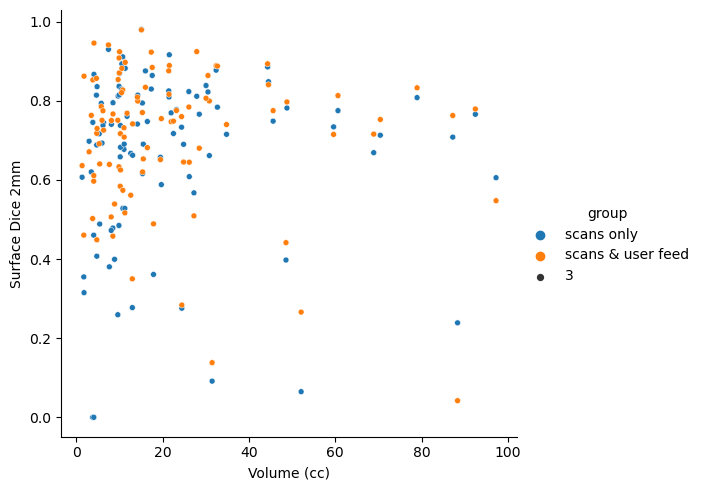

In [33]:
sns.relplot(x="Volume (cc)", y="Surface Dice 2mm", hue = 'group', data=dft, size=3, height=5,aspect=1.1)
#plt.set_title('GTV-N User feed Surface Dice to Volume scatter plot')

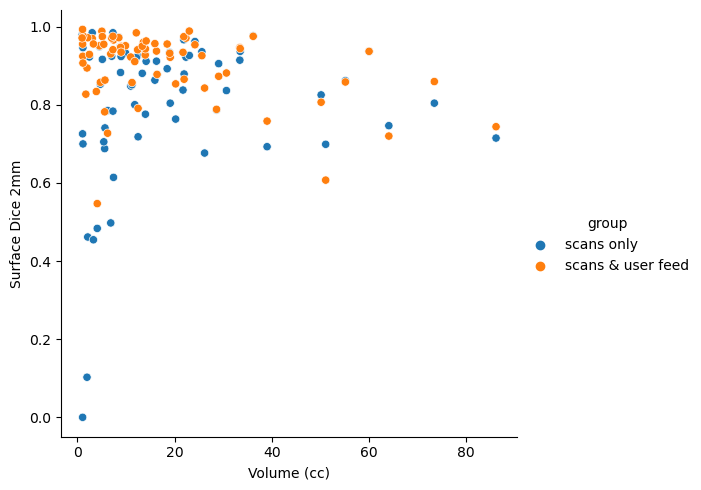

In [34]:
sns.relplot(x="Volume (cc)", y="Surface Dice 2mm", hue = 'group', data=dfn, height=5,aspect=1.1)

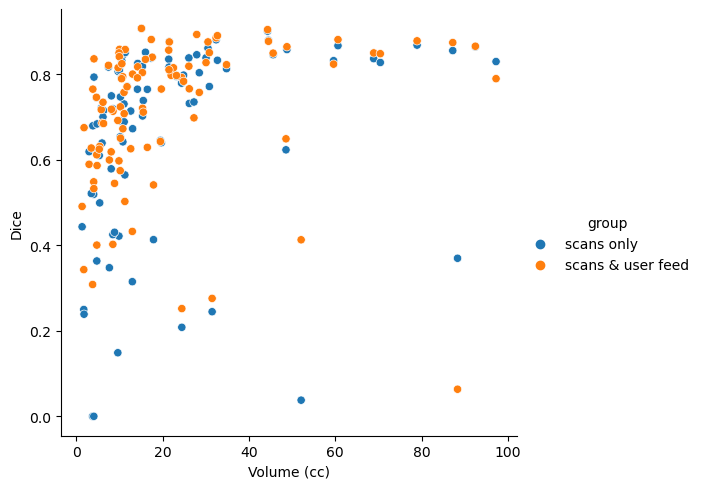

In [35]:
sns.relplot(x="Volume (cc)", y="Dice", hue = 'group', data=dft,  height=5,aspect=1.1)


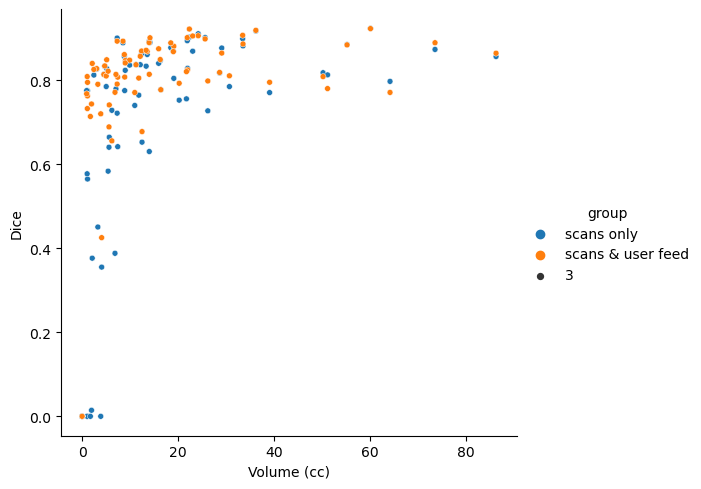

In [36]:
sns.relplot(x="Volume (cc)", y="Dice", hue = 'group', data=dfn, size=3, height=5,aspect=1.1)

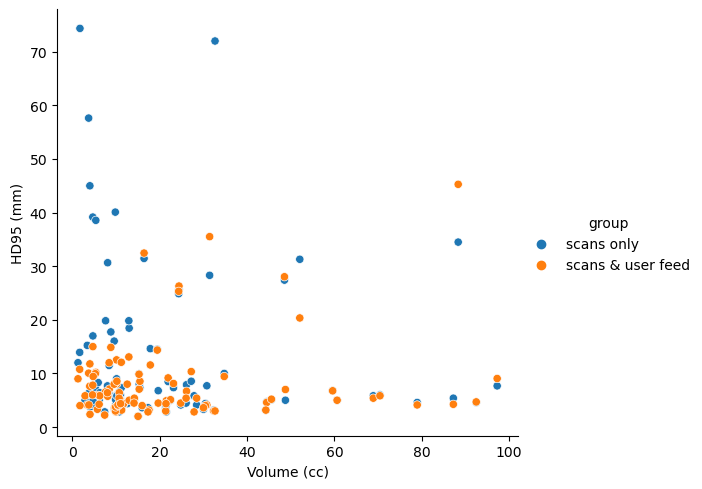

In [37]:
sns.relplot(x="Volume (cc)", y="HD95 (mm)", hue = 'group', data=dft,  height=5,aspect=1.1)


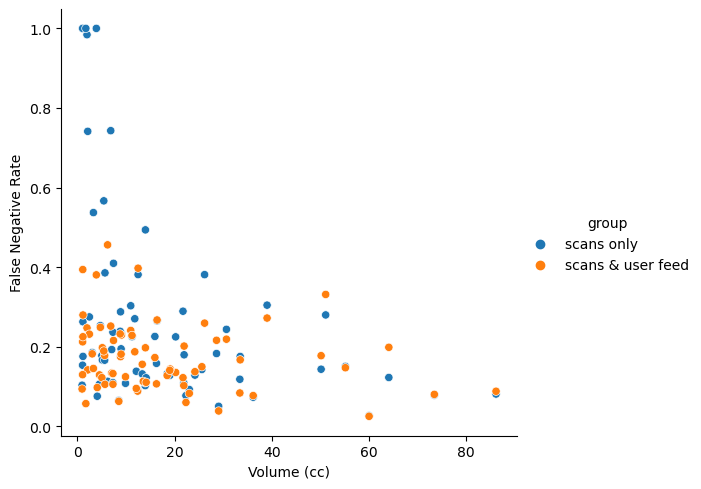

In [38]:
sns.relplot(x="Volume (cc)", y="False Negative Rate", hue = 'group', data=dfn, height=5,aspect=1.1)


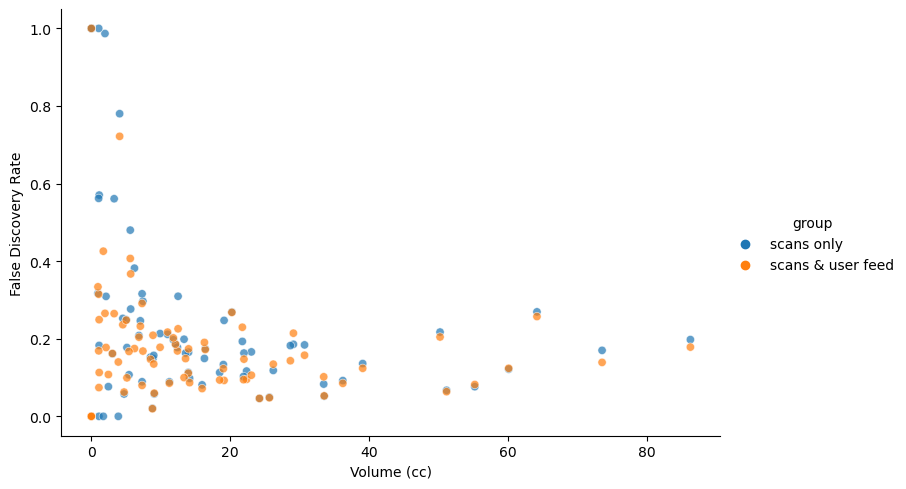

In [39]:
sns.relplot(x="Volume (cc)", y="False Discovery Rate", hue = 'group', data=dfn, height=5,aspect=1.5, alpha=0.7)


In [40]:
#df_pred_gtvt['False Negative Rate']> 0.9 and df_feed_gtvt['False Negative Rate']<0.6

dfn.query('`False Negative Rate` > 0.7')


,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_154,0.999900,14.517583,0.376511,0.309252,0.741216,0.000087,1.352518e-05,33.000000,0.231915,0.999913,0.690748,0.258784,0.357646,0.461694,0.547971,2.11,0.79,0.999986,1.0,scans only
HNCDL_179,0.999699,0.682438,0.388135,0.208277,0.742916,0.000276,2.509661e-05,31.451549,0.240799,0.999724,0.791723,0.257084,0.425626,0.497696,0.544157,6.85,2.22,0.999975,1.0,scans only
HNCDL_212,0.999942,NaN,0.000000,0.000000,1.000000,0.000058,0.000000e+00,NaN,0.000000,0.999942,NaN,0.000000,NaN,NaN,NaN,1.09,0.00,1.000000,1.0,scans only
HNCDL_240,0.999790,NaN,0.000000,0.000000,1.000000,0.000210,0.000000e+00,NaN,0.000000,0.999790,NaN,0.000000,NaN,NaN,NaN,3.88,0.00,1.000000,1.0,scans only
HNCDL_280,0.999779,23.967667,0.014445,0.986712,0.984176,0.000101,1.205286e-04,49.618536,0.007275,0.999899,0.013288,0.015824,0.056991,0.102660,0.162776,1.96,2.33,0.999879,1.0,scans only
HNCDL_290,0.999940,40.422766,0.000000,1.000000,1.000000,0.000060,5.650093e-08,59.387709,0.000000,0.999940,0.000000,0.000000,0.000000,0.000000,0.000000,1.06,0.00,1.000000,1.0,scans only
HNCDL_335,0.999909,NaN,0.000000,0.000000,1.000000,0.000091,0.000000e+00,NaN,0.000000,0.999909,NaN,0.000000,NaN,NaN,NaN,1.72,0.00,1.000000,1.0,scans only


In [41]:
dfn.loc['HNCDL_280']

,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_280,0.999779,23.967667,0.014445,0.986712,0.984176,0.000101,0.000121,49.618536,0.007275,0.999899,0.013288,0.015824,0.056991,0.102660,0.162776,1.96,2.33,0.999879,1.0,scans only
HNCDL_280,0.999947,1.078927,0.743635,0.265438,0.247065,0.000025,0.000028,3.653188,0.591894,0.999975,0.734562,0.752935,0.747243,0.894469,0.947892,1.96,2.01,0.999972,1.0,scans & user feed


In [42]:
dfn.loc['HNCDL_179']

,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_179,0.999699,0.682438,0.388135,0.208277,0.742916,0.000276,0.000025,31.451549,0.240799,0.999724,0.791723,0.257084,0.425626,0.497696,0.544157,6.85,2.22,0.999975,1.0,scans only
HNCDL_179,0.999835,0.621788,0.771420,0.204009,0.251680,0.000093,0.000071,3.000000,0.627896,0.999907,0.795991,0.748320,0.843455,0.930544,0.964721,6.85,6.44,0.999929,1.0,scans & user feed


In [43]:
dfn.loc['HNCDL_154']

,Accuracy,Mean Surface Distance (mm),Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,Negative Predictive Value,Precision,Recall,Surface Dice 1mm,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,group
HNCDL_154,0.999900,14.517583,0.376511,0.309252,0.741216,0.000087,0.000014,33.0,0.231915,0.999913,0.690748,0.258784,0.357646,0.461694,0.547971,2.11,0.79,0.999986,1.0,scans only
HNCDL_154,0.999962,0.680867,0.840149,0.177434,0.141500,0.000017,0.000022,2.0,0.724359,0.999983,0.822566,0.858500,0.895198,0.971859,0.995420,2.11,2.20,0.999978,1.0,scans & user feed


In [44]:
dft['GTV'] = dft['GTV'].replace([0.0], 'GTV-T')
dfn['GTV'] = dfn['GTV'].replace([1.0], 'GTV-N')

df_all = dft.append(dfn)


/tmp/ipykernel_2118024/3553742478.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = dft.append(dfn)


Using zero_method  wilcox
GTV-N_scans only v.s. GTV-N_scans & user feed: Wilcoxon test (paired samples), P_val=7.418e-05 stat=9.235e+02
Using zero_method  wilcox
GTV-T_scans only v.s. GTV-T_scans & user feed: Wilcoxon test (paired samples), P_val=7.662e-06 stat=1.133e+03
Using zero_method  wilcox
GTV-N_scans only v.s. GTV-N_scans & user feed: Wilcoxon test (paired samples), P_val=8.385e-04 stat=7.430e+02
Using zero_method  wilcox
GTV-T_scans only v.s. GTV-T_scans & user feed: Wilcoxon test (paired samples), P_val=7.474e-01 stat=2.287e+03


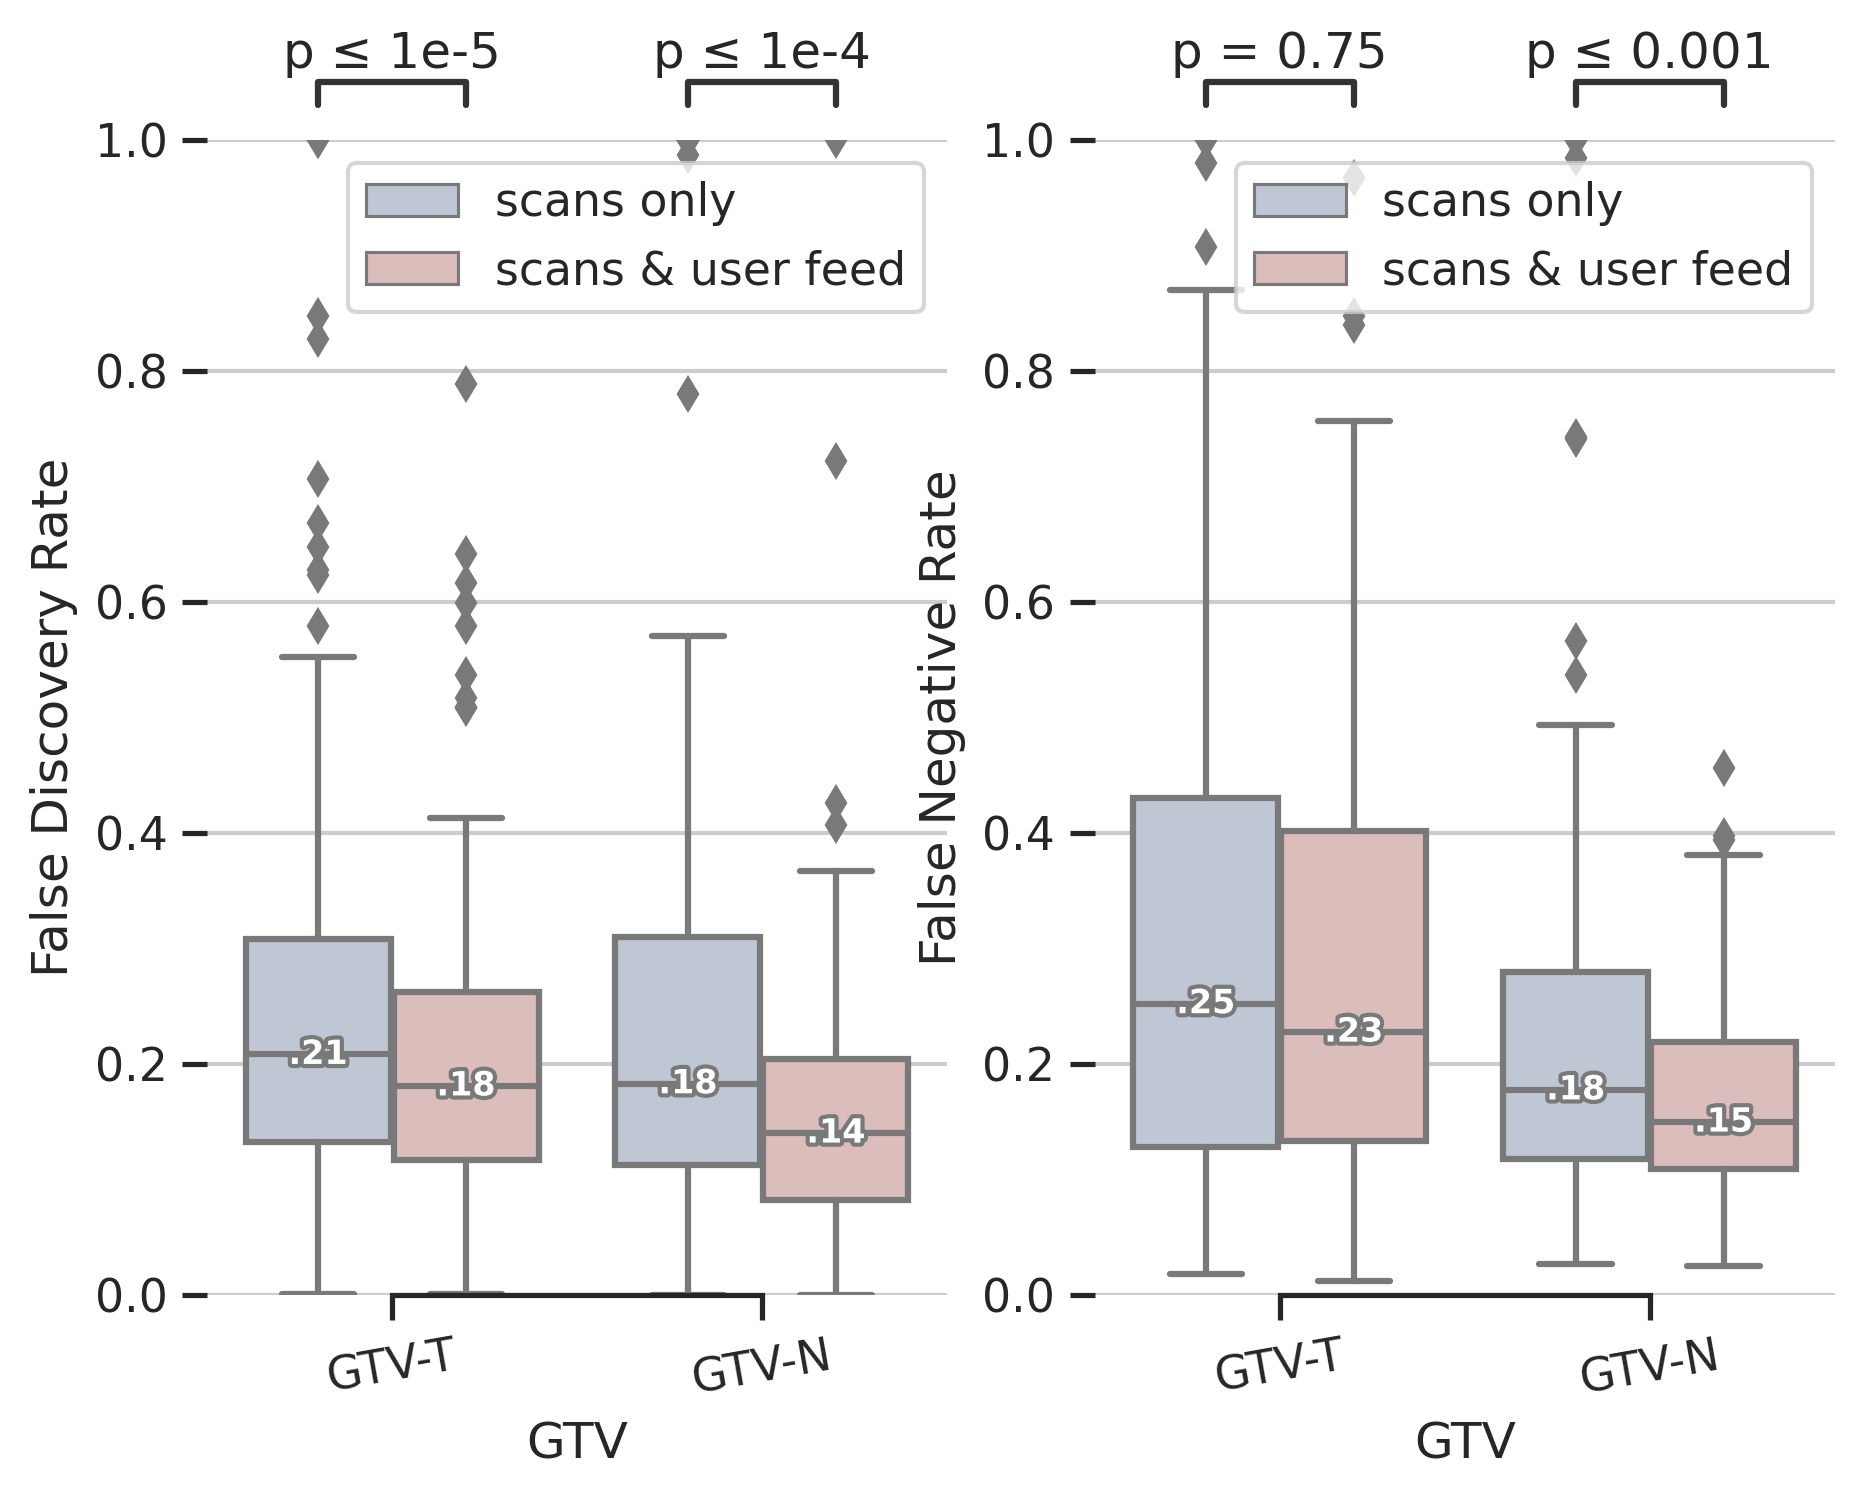

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import statannot
sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(7, 5), dpi=300)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
#sns.violinplot(ax=axs[0], x="GTV", y="False Discovery Rate",  hue="group", data=df_all,
             #width=.8, palette="vlag")
sns.boxplot(ax=axs[0], x="GTV", y="False Discovery Rate",  hue="group", data=df_all,
             width=.8, palette="vlag")
# Add in points to show each observation

sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
axs[0].set(ylim=(0, 1))
#axs[0].set(ylabel="False Discovery Rate", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=labels)

# Plot the orbital period with horizontal boxes
#sns.violinplot(ax=axs[1], x="GTV", y="False Negative Rate",  hue="group", data=df_all,  
             #width=.8, palette="vlag")
sns.boxplot(ax=axs[1], x="GTV", y="False Negative Rate",  hue="group", data=df_all,  
             width=.8, palette="vlag")
# sns.violinplot(ax=axs[1], x="group", y="False Discovery Rate",  data=dfn, ci=0.5, 
#              width=.8, palette="vlag")

# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

add_median_ci_labels(axs[0])
add_median_ci_labels(axs[1])

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 1))
#axs[1].set(ylabel=" ", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels)


statannot.add_stat_annotation(
    axs[0],
    data=df_all,
    x="GTV",
    y="False Discovery Rate",
    hue="group",
    box_pairs=[
        (("GTV-T", "scans only"), ("GTV-T", "scans & user feed")),
        (("GTV-N", "scans only"), ("GTV-N", "scans & user feed")),
    ],
    test="Wilcoxon", #wilcoxon
    text_format="simple",
    loc="outside",
    comparisons_correction=None
)

statannot.add_stat_annotation(
    axs[1],
    data=df_all,
    x="GTV",
    y="False Negative Rate",
    hue="group",
    box_pairs=[
        (("GTV-T", "scans only"), ("GTV-T", "scans & user feed")),
        (("GTV-N", "scans only"), ("GTV-N", "scans & user feed")),
    ],
    test="Wilcoxon", #wilcoxon
    text_format="simple",
    loc="outside",
    comparisons_correction=None
)

plt.savefig('user_box.svg')
# x1, x2 = 0, 1   
# y, h, col = df_all['False Discovery Rate'].median() + 0, 0.05, 'k'
# axs[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)

# axs[0].text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

# x1, x2 = 0, 1   
# y, h, col = df_all['False Negative Rate'].median() + 0, 0.05, 'k'
# axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)

# axs[1].text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


[Text(0, 0, 'scans only'), Text(1, 0, 'scans & user feed')]

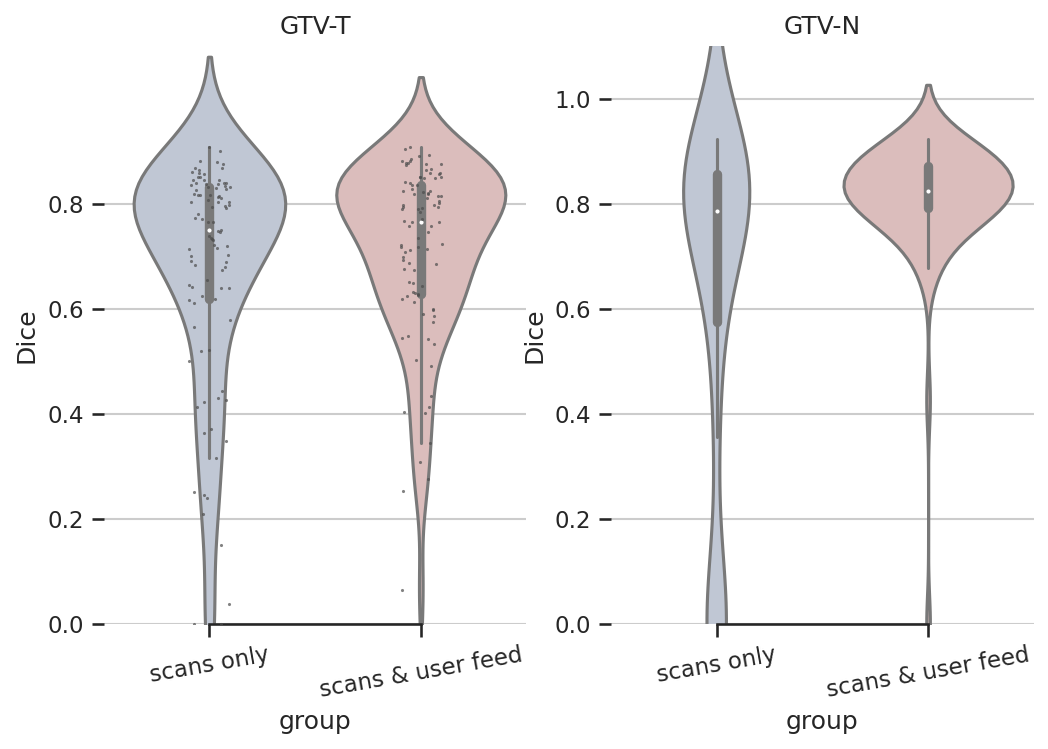

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(8, 5), dpi=150)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[0], x="group", y="Dice",  data=dft,
             width=.8, palette="vlag")
# Add in points to show each observation
sns.stripplot(ax=axs[0],x="group", y="Dice", data=dft,
              size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
axs[0].set(ylim=(0, 1.1))
axs[0].set(ylabel="Dice", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)


# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[1], x="group", y="Dice",  data=dfn,
             width=.8, palette="vlag")
# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 1.1))
axs[1].set(ylabel="Dice", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)


[Text(0, 0, 'scans only'), Text(1, 0, 'scans & user feed')]

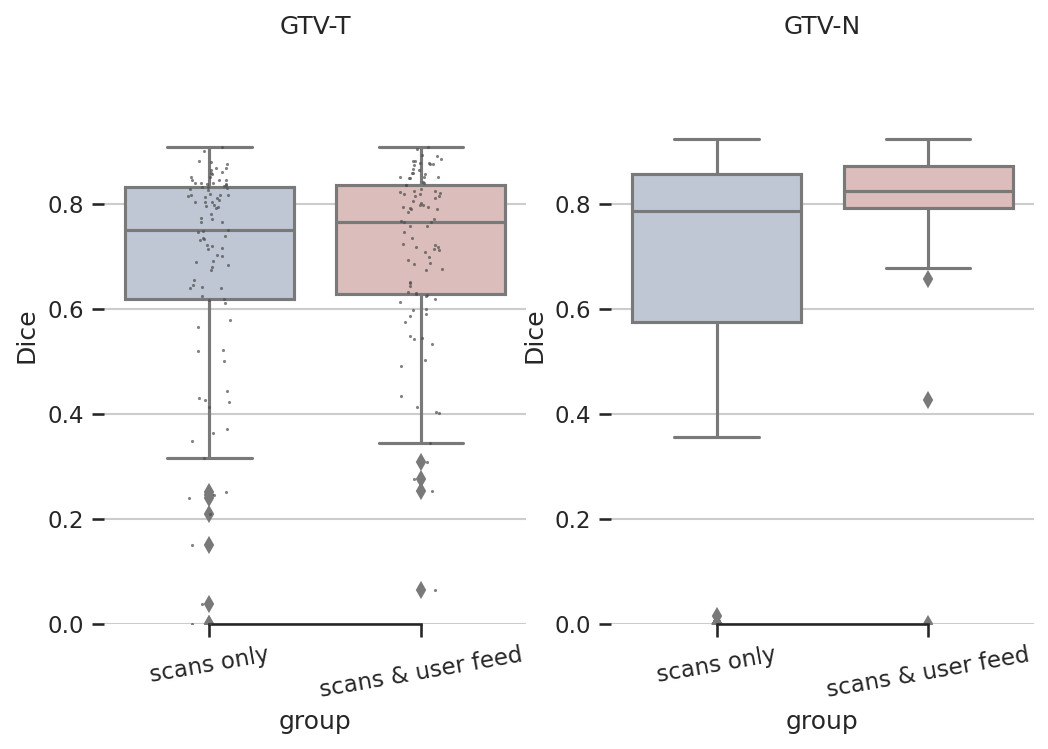

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(8, 5), dpi=150)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(ax=axs[0], x="group", y="Dice",  data=dft,
             width=.8, palette="vlag")
# Add in points to show each observation
sns.stripplot(ax=axs[0],x="group", y="Dice", data=dft,
              size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
axs[0].set(ylim=(0, 1.1))
axs[0].set(ylabel="Dice", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)


# Plot the orbital period with horizontal boxes
sns.boxplot(ax=axs[1], x="group", y="Dice",  data=dfn,
             width=.8, palette="vlag")
# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 1.1))
axs[1].set(ylabel="Dice", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)


[Text(0, 0, 'scans only'), Text(1, 0, 'scans & user feed')]

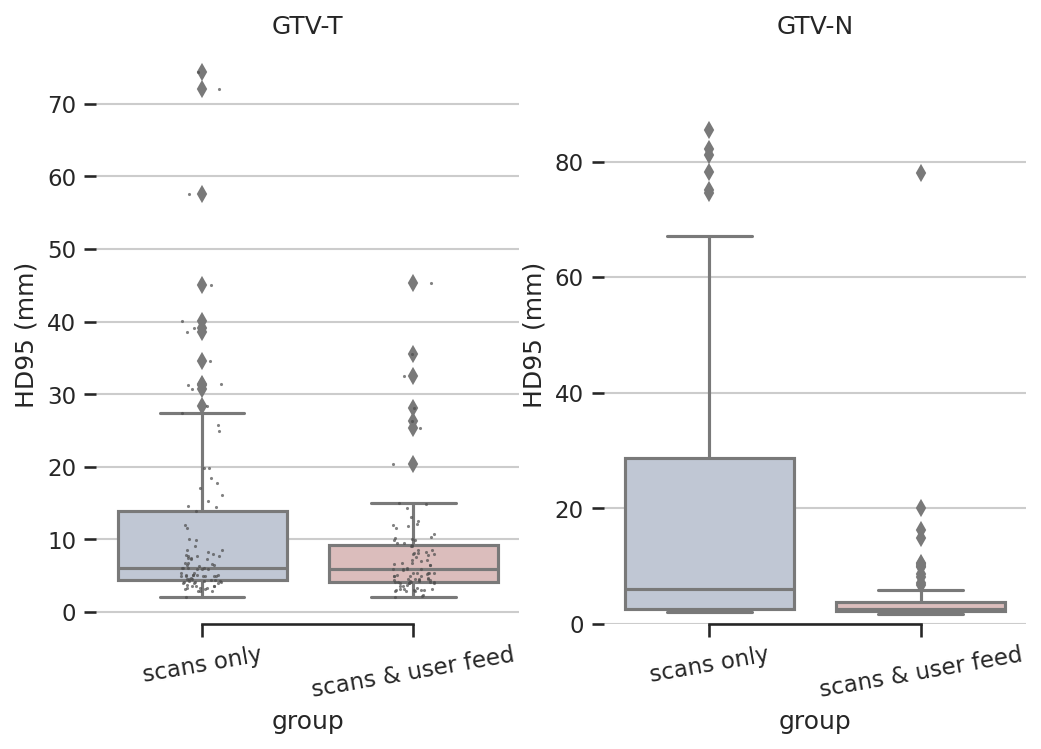

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(8, 5), dpi=150)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(ax=axs[0], x="group", y="HD95 (mm)",  data=dft,
             width=.8, palette="vlag")
# Add in points to show each observation
sns.stripplot(ax=axs[0],x="group", y="HD95 (mm)", data=dft,
              size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
#axs[0].set(ylim=(0, 1.1))
axs[0].set(ylabel="HD95 (mm)", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)


# Plot the orbital period with horizontal boxes
sns.boxplot(ax=axs[1], x="group", y="HD95 (mm)",  data=dfn,
             width=.8, palette="vlag")
# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 100))
axs[1].set(ylabel="HD95 (mm)", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)

[Text(0, 0, 'scans only'), Text(1, 0, 'scans & user feed')]

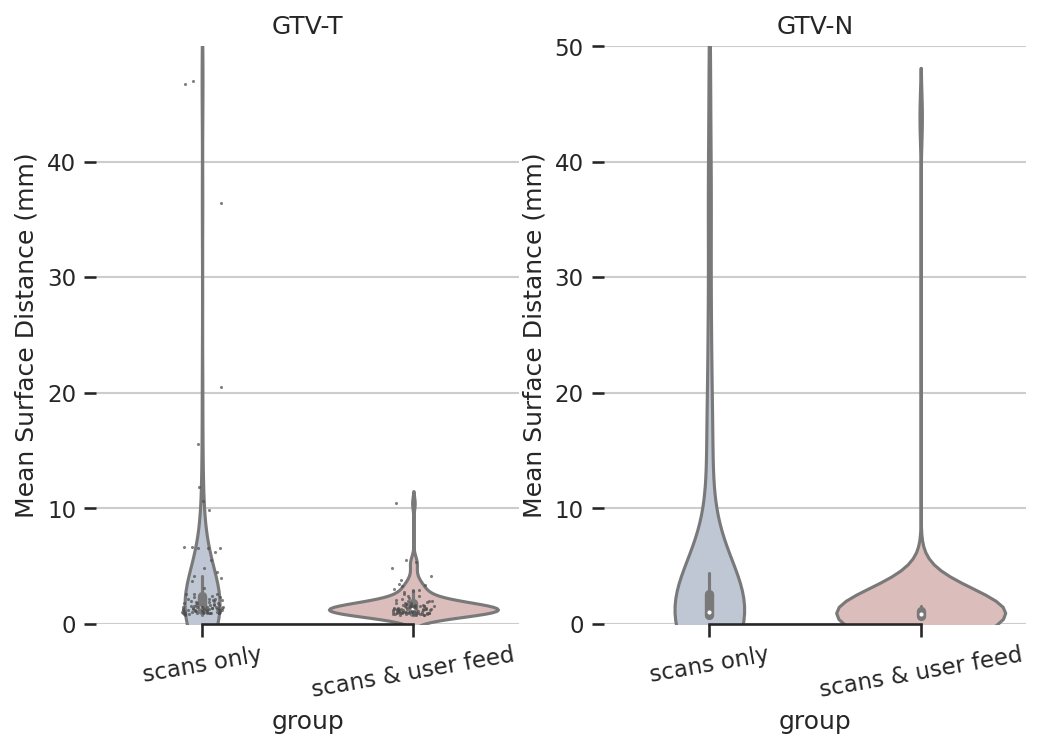

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(8, 5), dpi=150)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[0], x="group", y="Mean Surface Distance (mm)",  data=dft,
             width=.8, palette="vlag")
# Add in points to show each observation
sns.stripplot(ax=axs[0],x="group", y="Mean Surface Distance (mm)", data=dft,
              size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
axs[0].set(ylim=(0, 50))
axs[0].set(ylabel="Mean Surface Distance (mm)", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)


# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[1], x="group", y="Mean Surface Distance (mm)",  data=dfn,
             width=.8, palette="vlag")
# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 50))
axs[1].set(ylabel="Mean Surface Distance (mm)", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)

[Text(0, 0, 'scans only'), Text(1, 0, 'scans & user feed')]

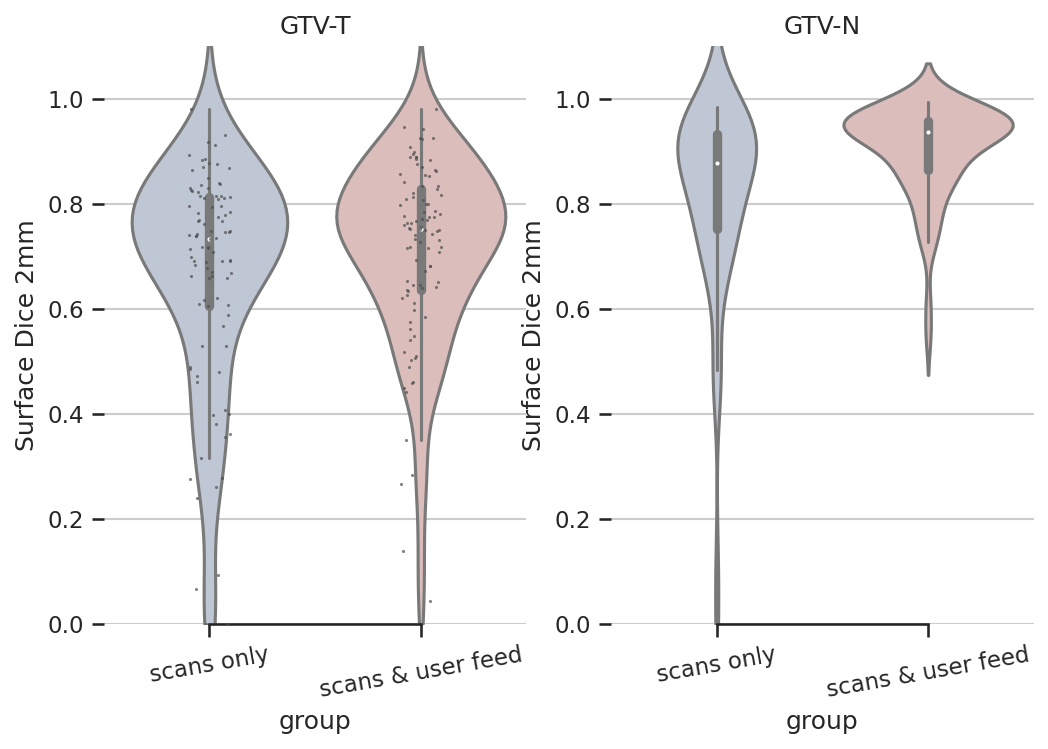

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,2,figsize=(8, 5), dpi=150)
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[0], x="group", y="Surface Dice 2mm",  data=dft,
             width=.8, palette="vlag")
# Add in points to show each observation
sns.stripplot(ax=axs[0],x="group", y="Surface Dice 2mm", data=dft,
              size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[0],trim=True, left=True)

# Tweak the visual presentation
axs[0].yaxis.grid(True)
axs[0].set(ylim=(0, 1.1))
axs[0].set(ylabel="Surface Dice 2mm", title ='GTV-T')
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=10)


# Plot the orbital period with horizontal boxes
sns.violinplot(ax=axs[1], x="group", y="Surface Dice 2mm",  data=dfn,
             width=.8, palette="vlag")
# Add in points to show each observation
# sns.stripplot(ax=axs[1],x="group", y="False Negative Rate", data=dfn,
#               size=1.5, color=".3", linewidth=0, alpha=0.7)
sns.despine(ax=axs[1],trim=True, left=True)

# Tweak the visual presentation
axs[1].yaxis.grid(True)
axs[1].set(ylim=(0, 1.1))
axs[1].set(ylabel="Surface Dice 2mm", title ='GTV-N')
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=10)

## Object FDR and FNR
This might be not perfectly correct.

In [50]:
from object_roc import *
ref_path = paths.ref
pred_path = paths.pred

fpr, tpr = aggregate_scores(ref_path, pred_path)


/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_003.nii.gz
0 - 10143 - 5478
1 - 86214 - 98781
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_007.nii.gz
0 - 24423 - 6033
1 - 9054 - 7370
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_010.nii.gz
0 - 26154 - 17884
1 - 0 - 3457
1 no ref but pred_tmp prediced
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_011.nii.gz
0 - 17862 - 4995
1 - 22335 - 23340
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_034.nii.gz
0 - 97242 - 74001
1 - 20223 - 21443
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_045.nii.gz
0 - 48555 - 22905
1 - 7419 - 6229
/da

/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_290.nii.gz
0 - 14202 - 14441
1 - 1056 - 1
1 pred_tmp not enough pixels
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_299.nii.gz
0 - 8100 - 6903
1 - 0 - 0
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_301.nii.gz
0 - 3747 - 1850
1 - 1134 - 2176
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_307.nii.gz
0 - 21525 - 21625
1 - 21957 - 21527
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_311.nii.gz
0 - 3444 - 3227
1 - 0 - 0
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/test/HNCDL_316.nii.gz
0 - 15285 - 16300
1 - 16389 - 14588
/data/jintao/nnUNet/nn

KeyboardInterrupt: 

In [ ]:
tpr.mean()

In [ ]:
fpr.mean()

In [ ]:
def count_num_gtv(gtv_path):
    img = sitk.ReadImage(gtv_path)
    arr = sitk.GetArrayFromImage(img)
    
    cleared = clear_border(arr)
    #print(cleared.shape)
    
    labels = ['background', 'GTVt', 'GTVn']
    label_image = label(cleared)
    #new_arr = np.zeros(arr.shape)
    
    patient_dict = {}
    
    #np.bincount(x).argmax()
    pt_name = gtv_path[-16:-7]
    #print('---------', pt_name, '---------')
    patient_dict['PatientID'] = pt_name
    patient_dict['GTVt'] =[]
    patient_dict['GTVn'] =[]
    
    bbox_list = []
    for region in regionprops(label_image):
        if region.area>100:
            bbox = region.bbox
            patch = arr[bbox[0]:bbox[3], bbox[1]:bbox[4], bbox[2]:bbox[5]]
            
            flatten_patch = patch.flatten()
            flatten_patch = flatten_patch[flatten_patch != 0]
            
            argmax = np.bincount(flatten_patch).argmax()
            #print(pt_name, np.unique(flatten_patch))
            patient_dict[labels[argmax]].append(bbox)
        if region.area<=50:
            print(pt_name, '!!! GTV smaller than 100!!!')
   
    # don't know why this part don't work, it only give one GTVn
    """    
    for i, gtv in enumerate(['GTVt', 'GTVn']):
        #print(gtv, region.area)
        count = 0 
        label_arr = (label_image== (i+1)).astype(int)
        #print(label_arr.sum())
        bbox = [] 
        for region in regionprops(label_arr):
            print(gtv, region.area)
            if region.area>100:
                bbox.append([region.bbox])"""

    #patient_dict[gtv] = bbox
        
    return patient_dict
    
# if __name__ == '__main__':
work_path = paths.ref
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))

# for path in gtv_path:
#     df = count_num_gtv(path)
#     print(df)
gtv_dict = []

#compare(files[0])
with Pool(64) as p:
    gtv_dict.append(p.map(count_num_gtv, gtv_path))


Count GTV-T and GTV-N from reference.

In [ ]:
gtv_ref_df = pd.DataFrame.from_dict(gtv_dict[0])
count_GTVt= 0
for gtv in gtv_ref_df['GTVt']:
    count_GTVt += len(gtv)
    
count_GTVn= 0
for gtv in gtv_ref_df['GTVn']:
    count_GTVn += len(gtv)
    
print(count_GTVt, count_GTVn)

In [ ]:
gtv_ref_df.to_csv("gt_gtv_bbox.csv")

Count GTV-T and GTV-N from user feed.

In [ ]:
work_path = paths.feed_pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))
gtv_feed_dict = []
with Pool(64) as p:
    gtv_feed_dict.append(p.map(count_num_gtv, gtv_path))
    
gtv_feed_df = pd.DataFrame.from_dict(gtv_feed_dict[0])
count_GTVt= 0
for gtv in gtv_feed_df['GTVt']:
    count_GTVt += len(gtv)
    
count_GTVn= 0
for gtv in gtv_feed_df['GTVn']:
    count_GTVn += len(gtv)
    
print(count_GTVt, count_GTVn)

Count GTV-T and GTV-N from user feed.

In [ ]:
work_path = paths.pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))
gtv_pred_dict = []
with Pool(64) as p:
    gtv_pred_dict.append(p.map(count_num_gtv, gtv_path))
    
gtv_pred_df = pd.DataFrame.from_dict(gtv_pred_dict[0])
count_GTVt= 0
for gtv in gtv_pred_df['GTVt']:
    count_GTVt += len(gtv)
    
count_GTVn= 0
for gtv in gtv_pred_df['GTVn']:
    count_GTVn += len(gtv)
    
print(count_GTVt, count_GTVn)

In [ ]:
gtv_ref_df

## calculate detection rate

In [ ]:
from medpy.metric.binary import dc
# gtv_ref_df is required 
gtv_ref_df
def detect_counts(gtv_path, gtv='GTVt'):
    
    labels = {'background':0, 'GTVt':1, 'GTVn':2}
    gtv_value = labels[gtv]
    
    pt_name = gtv_path[-16:-7]
    #print(f"-----{pt_name}-----")
    ref_img = sitk.ReadImage(os.path.join(paths.ref, pt_name+'.nii.gz'))
    ref_arr = sitk.GetArrayFromImage(ref_img)
    
    ref_arr = (ref_arr==gtv_value).astype(int)
    
    #print(ref_arr.shape)
    
    img = sitk.ReadImage(gtv_path)
    pred_arr = sitk.GetArrayFromImage(img)
    pred_arr = (pred_arr==gtv_value).astype(int)

    df2=gtv_ref_df.query("PatientID == @pt_name")
    
    detected_count = 0
    
    for i in df2[gtv]:
        for bbox in i:
            temp_ref = np.zeros(ref_arr.shape)
            temp_ref[bbox[0]:bbox[3], bbox[1]:bbox[4], bbox[2]:bbox[5]] = ref_arr[bbox[0]:bbox[3], bbox[1]:bbox[4], bbox[2]:bbox[5]]
            if dc(pred_arr, temp_ref)> 0.0:
                detected_count += 1
    return detected_count

work_path = paths.pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))

detected_count = 0
for gtv in gtv_path:
    detected_count+=detect_counts(gtv, gtv='GTVt')
print(work_path)
print("detection rate for GTVt is ", (detected_count+1)/100) #there is one GTVt missing on reference, visually examed detected on both pred and feed.

In [ ]:
work_path = paths.feed_pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))

detected_count = 0
for gtv in gtv_path:
    detected_count+=detect_counts(gtv, gtv='GTVt')
print(work_path)
print("detection rate for feed GTVt is ", (detected_count+1)/100) #there is one GTVt missing on reference, visually examed detected on both pred and feed.

In [ ]:
work_path = paths.pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))

detected_count = 0
for gtv in gtv_path:
    detected_count+=detect_counts(gtv, gtv='GTVn')
print(work_path)
print("detection rate for feed GTVt is ", detected_count/177) #

In [ ]:
work_path = paths.feed_pred
gtv_path = glob.glob(os.path.join(work_path, '*.nii.gz'))

detected_count = 0
for gtv in gtv_path:
    detected_count+=detect_counts(gtv, gtv='GTVn')
print(work_path)
print("detection rate for feed GTVt is ", detected_count/177) #

## plot examples

In [ ]:
paths.imgs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np
import medvis
from skimage import measure
import matplotlib.patches as mpatches
from matplotlib import gridspec

def load_nii(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))


def show_contours(img, seg, slice_no, ax):
    contours = measure.find_contours(img[-1][slice_no,:,:], 0.5)
    for n, contour in enumerate(contours):
        if n == 0: 
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.1, label='Ground truth', c='red',  alpha = 0.8)
        else:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.1, c='red',  alpha = 0.8)

    contours = measure.find_contours(seg[slice_no,:,:], 0.5)  
    for n, contour in enumerate(contours):
        if n == 0: 
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.1, label='Prediction', c='lime',  alpha = 0.8)
        else:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.1, c='lime',  alpha = 0.8)   
        
    plt.legend(fontsize=10) 

    
    return

def load_all_images(img_paths, seg_path):
    
    for i in range(4):
        if i == 0:
            imgs = load_nii(join(img_paths,patient+'_000%d.nii.gz'%i))
            imgs = np.expand_dims(imgs, axis=0)
        else:
            img = load_nii(join(img_paths,patient+'_000%d.nii.gz'%i))
            img = np.expand_dims(img, axis=0)
            imgs = np.concatenate((imgs, img), axis = 0 )
    
    seg = load_nii(join(seg_path, patient+'.nii.gz'))
    seg = np.expand_dims(seg, axis=0)
    imgs = np.concatenate((imgs, seg), axis = 0 )
    
    return imgs

def plot_uncertainty_maps(patient, slice_no, t = 0.2, bbox = [60, 170, 60, 170]):
    x_min, x_max, y_min, y_max = bbox
    #img = np.load(os.path.join(cropped_data_path,  patient+'.npz'))['data']

    #path_to_uncertainty_maps = '/mnt/faststorage/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task300_MCDrop/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/uncertianty_maps_entropy_test/'
    
    img = load_all_images(raw_data_path+'imagesTs', raw_data_path+'labelsTs')
    #u_map = np.load(os.path.join(config['path_to_uncertainty_maps'], patient+'.npy'))
    u_map = np.load(os.path.join(path_to_uncertainty_maps, patient+'.npy'))
    seg = load_nii(os.path.join(config['path_to_softmax_and_segmentations'], patient+'.nii.gz'))
    print(u_map.max(),u_map.min())
    blended_pet_image = medvis.apply_cmap_with_blend(img[1][slice_no], 'magma')
    blended_u_map = medvis.apply_cmap_with_blend(u_map[slice_no], 'magma')

    error_map = seg[slice_no] - img[-1][slice_no]

    assert img.shape[1:] == u_map.shape and img.shape[1:] == seg.shape, \
        f"Shape mismatch for the image with the shape {img.shape} and the u_map with the shape {u_map.shape} or seg map shape {seg.shape}."

    fig = plt.figure(figsize=(15,5))
    gs  = gridspec.GridSpec(1, 4, width_ratios=[1, 1 ,1.25, 1])
    
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>
    ax0 = plt.subplot(gs[0])
    ax0.imshow(img[0][slice_no], cmap ='gray', vmin=900, vmax=1250)
    ax0.imshow(blended_pet_image)
    ax0.set_title('PET/CT', fontsize=20)
    show_contours(img, seg, slice_no, ax0)
    plt.axis('off')
    plt.axis([x_min, x_max, y_min, y_max])
    plt.gca().invert_yaxis()
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>
    #ax1.imshow(img[-1][slice_no])
    #ax1 = plt.subplot(142)
    ax1 = plt.subplot(gs[1])
    u_map01 = u_map[slice_no]>t
    blended_error_map = medvis.apply_cmap_with_blend(error_map, 'seismic')#, 'bwr')
    ax1.imshow(img[0][slice_no], cmap = 'gray', vmin=900, vmax=1250, alpha = 0.8)     
    ax1.imshow(error_map, cmap ='seismic', alpha = 0.5, vmin=-1, vmax=1)  
    #ax1.imshow(blended_error_map, cmap ='bwr')
    red_patch = mpatches.Patch(color='red', label='False Positives')
    blue_patch = mpatches.Patch(color='blue', label='False Negatives')
    plt.legend(handles=[red_patch, blue_patch])
    ax1.set_title('Error region', fontsize=20)
    plt.axis('off')
    plt.axis([x_min, x_max, y_min, y_max])
    plt.gca().invert_yaxis()
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # >>>>>>>>>>>>>>>>>>>>>
    #ax2 = plt.subplot(143)
    ax2 = plt.subplot(gs[2])
    ax2.imshow(img[0][slice_no], cmap ='gray', vmin=900, vmax=1250, alpha = 0.8)   
    ax2.imshow(blended_u_map)
    #show_contours(img, seg, slice_no, ax2)
    bar = ax2.pcolormesh(np.random.random((20, 20)),cmap= 'magma')
    
    plt.colorbar(bar, ax=ax2, location='right', shrink=0.6)
    ax2.set_title('Uncertainty map', fontsize=20)
    plt.axis('off')
    plt.axis([x_min, x_max, y_min, y_max])
    plt.gca().invert_yaxis()
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # >>>>>>>>>>>>>>>>>>>>>>>>>>
    #ax3 = plt.subplot(144)
    ax3 = plt.subplot(gs[3])
    u_map01 = u_map[slice_no]>t
    blended_u_map01 = medvis.apply_cmap_with_blend(u_map01, 'Oranges')
    ax3.imshow(img[0][slice_no], cmap = 'gray', vmin=900, vmax=1250, alpha = 0.8)   
    ax3.imshow(blended_u_map01,  cmap = 'Oranges')
    ax3.set_title('Uncertainty region',fontsize=20)
    contours = measure.find_contours(seg[slice_no,:,:], 0.5)  
    for n, contour in enumerate(contours):
        if n == 0: 
            ax3.plot(contour[:, 1], contour[:, 0], linewidth=0.8, label='Prediction', c='lime',  alpha = 0.8)
        else:
            ax3.plot(contour[:, 1], contour[:, 0], linewidth=0.8, c='lime',  alpha = 0.8)   
    ax3handles, ax3labels = ax3.get_legend_handles_labels()
    orange_patch = mpatches.Patch(color='firebrick', label='Uncertainty level>%.1f' %t)
    try:
        plt.legend(handles=[ax3handles[0], orange_patch], fontsize=10) 
    except IndexError:
            try:
                plt.legend(handles=[orange_patch], fontsize=10) 
            except IndexError:
                print("No legend found..")

    plt.axis('off')
    #plt.colorbar(bar, ax=ax3, location='right', anchor=(0, 0.3), shrink=1)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.gca().invert_yaxis()
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # >>>>>>>>>>>>>>>>>>>>>>>>>>
#     ax4 = plt.subplot(gs[4])
#     t = t+0.4
#     u_map01 = u_map[slice_no]>t
#     blended_u_map01 = medvis.apply_cmap_with_blend(u_map01, 'Oranges')
#     ax4.imshow(img[0][slice_no], cmap = 'gray', vmin=900, vmax=1250, alpha = 0.8)   
#     ax4.imshow(blended_u_map01,  cmap = 'Oranges')
#     ax4.set_title('Uncertainty region',fontsize=20)
#     contours = measure.find_contours(seg[slice_no,:,:], 0.5)  
#     for n, contour in enumerate(contours):
#         if n == 0: 
#             ax4.plot(contour[:, 1], contour[:, 0], linewidth=0.6, label='Prediction', c='lime',  alpha = 0.8)
#         else:
#             ax4.plot(contour[:, 1], contour[:, 0], linewidth=0.6, c='lime',  alpha = 0.8)   
#     ax4handles, ax4labels = ax4.get_legend_handles_labels()
#     orange_patch = mpatches.Patch(color='firebrick', label='Uncertainty level>%.1f' %t)
#     plt.legend(handles=[ax4handles[0], orange_patch], fontsize=10) 
#     plt.axis('off')
#     #plt.colorbar(bar, ax=ax4, location='right', anchor=(0, 0.3), shrink=1)
#     plt.axis([x_min, x_max, y_min, y_max])
#     plt.gca().invert_yaxis()
    plt.subplots_adjust(wspace=0.02, hspace=0)

    plt.savefig(f'entropy_plots_test/{patient}_s{slice_no}_t{t}.png', dpi = 500, bbox_inches='tight')
    plt.savefig(f'entropy_plots_test/{patient}_s{slice_no}_t{t}.svg', dpi = 500, format = 'svg', bbox_inches='tight')

    return

patient = 'HNCDL_480'
slice_no = 76
t = 0.2
plot_uncertainty_maps(patient=patient, slice_no=slice_no, t = 0.5 , bbox = [70, 185, 60, 175])